In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

%matplotlib inline

In [36]:
file='electron.nc4'
elecdata=Dataset(file,mode='r')

In [37]:
elecdata

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    nx: 100
    ny: 100
    problem: double
    dimensions(sizes): rho_x(102), rho_y(102), phi_x(102), phi_y(102), Ex_x(100), Ex_y(100), Ey_x(100), Ey_y(100), r_g(1001), r_t(2), v_g(1001), v_t(2), a_g(1001), a_t(2)
    variables(dimensions): float64 Charge Density(rho_y, rho_x), float64 Electric Potential(phi_y, phi_x), float64 Ex_field(Ex_y, Ex_x), float64 Ey_field(Ey_y, Ey_x), float64 Position(r_t, r_g), float64 Velocity(v_t, v_g), float64 Acceleration(a_t, a_g)
    groups: 

In [7]:
Ex = elecdata.variables['Ex_field']
Ey = elecdata.variables['Ey_field']
pos = elecdata.variables['Position']

In [6]:
Ex.shape[0]

100

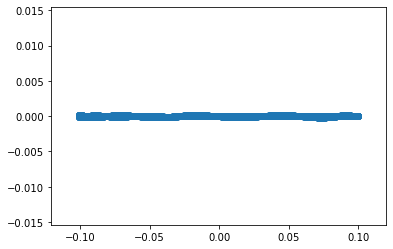

In [10]:
plt.scatter(pos[0,:], pos[1,:])

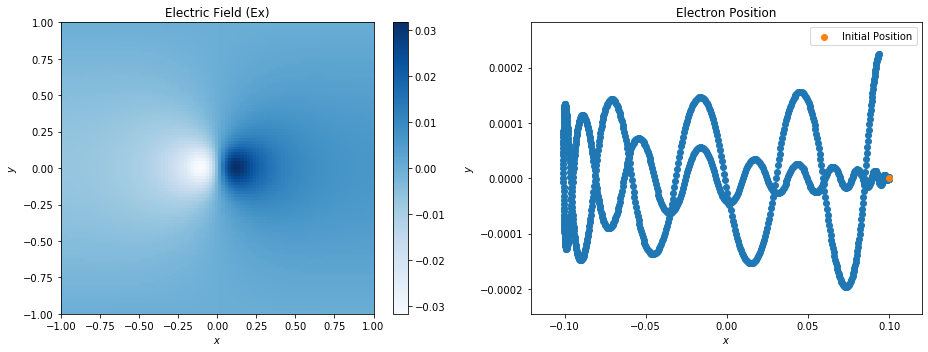

In [19]:
#pos[:,0] = x_data, pos[:,1] = y_data,

#This sets the grid size - possibly change later to be user defined
N=Ex.shape[0]
xdata = np.linspace(-1, 1, N)
ydata = np.linspace(-1, 1, N)

#This finds the proper y bounds for the position plot 
ylb=np.min(pos[1,:])*1.25
yub=np.max(pos[1,:])*1.25


#Pseudocolour plot of the variable Ex
#If it is being too slow use instead pcolormesh
#Need a 2d grid

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))

plt.subplot(1,2,1)
plt.pcolor(xdata, ydata, Ex, cmap = 'Blues' )
plt.title('Electric Field (Ex)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()
# plt.axis('tight')


#Scatter graph of particle positioon in x vs y
plt.subplot(1,2,2)
plt.scatter(pos[0,1:], pos[1,1:])
plt.scatter(pos[0,0], pos[1,1], label='Initial Position')
plt.title('Electron Position')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(ylb,yub)
plt.legend()
# plt.axis('tight')

plt.tight_layout()
plt.show()

In [2]:
filename='ising.nc'
fh=Dataset(filename,mode='r')

In [3]:
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description: Initial grid, final grid after T_timesteps and net magnetization history for Ising model simulation,  program file names and command line input given below.
    CodeFiles: ising.f90, sweetener.f90,  write_netcdf.f90, command_line.f90, random_mod.f90, ising.sh
    N_gridsize: 50
    T_timesteps: 1000000
    init_config: R
    beta_temp: 2.0
    J_interstr: 1.0
    dimensions(sizes): x(50), y(50), t(1000001)
    variables(dimensions): int32 x(x), int32 y(y), int32 t(t), int32 final_grid(y, x), int32 initial_grid(y, x), float32 net_magnetization(t)
    groups: 

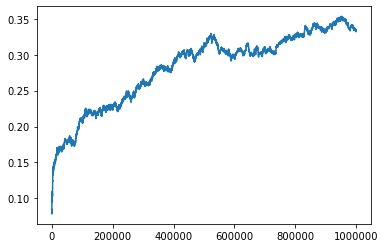

In [4]:
plt.plot(fh.variables['t'][:],fh.variables['net_magnetization'][:])

In [99]:
config_dict={'A':'Alternating','a':'Alternating','F':'Ferromagnet',\
             'f':'ferromagnet','R':'Random','r':'Random'}

In [117]:
dim=20
val0=1
np.arange(1,21).shape

(20,)

Text(0.5, 1.0, 'Random')

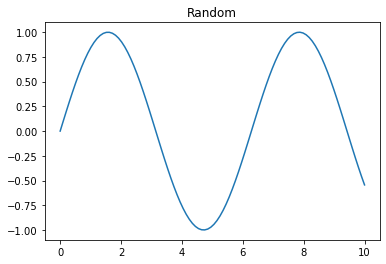

In [104]:
x=np.linspace(0,10,100)
y=np.sin(x)
plt.plot(x,y)
plt.title('{}'.format(config_dict['r']))

In [29]:
filename1='ex1.nc'
fh1=Dataset(filename1,mode='r')

In [105]:
fh1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: blah blah blah
    dimensions(sizes): lon(360), lat(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 Perturbations(lat, lon)
    groups: 

In [90]:
fh1.variables['Perturbations']

<class 'netCDF4._netCDF4.Variable'>
float32 Perturbations(lat, lon)
unlimited dimensions: 
current shape = (180, 360)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
netmag=np.array(fh.variables['net_magnetization'][:])
grid=np.array(fh.variables['grid_data'][:])

In [8]:
np.linspace(0,len(netmag),len(netmag))

array([0.00000e+00, 1.00001e+00, 2.00002e+00, ..., 9.99990e+04,
       1.00000e+05, 1.00001e+05])

In [ ]:
N=grid.shape[0]
x,y=np.meshgrid(range(N+1),range(N+1))
# fig=plt.figure(figsize=(8,8),dpi=80);    

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16*1.5,6*1.5),dpi=200)
plt.subplot(1,2,1)
# sp = fig.add_subplot()  
# plt.setp(sp.get_yticklabels(), visible=False)
# plt.setp(sp.get_xticklabels(), visible=False)      
plt.pcolormesh(x,y,grid,cmap='Reds')  # greys,cividis,Purples
plt.title('Final Grid Layout',fontsize=20)
# plt.axis('tight')    
plt.colorbar()

plt.subplot(1,2,2)
plt.xlabel(xlabel='timestep ($t$)',fontsize=18)
plt.ylabel(ylabel='Net Magnetization',fontsize=18)
plt.title('Net Magnetization of Grid',fontsize=20)
plt.scatter(range(netmag.shape[0]),netmag)

plt.show()

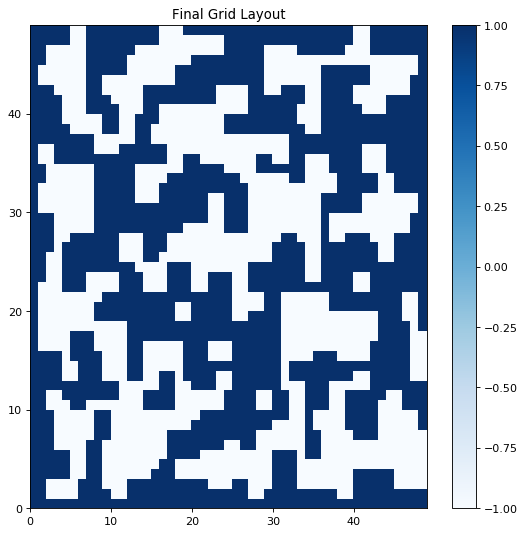

In [12]:
N=grid.shape[0]
x,y=np.meshgrid(range(N),range(N))
fig=plt.figure(figsize=(8,8),dpi=80);    
# sp = fig.add_subplot()  
# plt.setp(sp.get_yticklabels(), visible=False)
# plt.setp(sp.get_xticklabels(), visible=False)      
plt.pcolormesh(x,y,grid,cmap='Blues',vmin=-1,vmax=1)  # greys,cividis,Purples
plt.title('Final Grid Layout')
# plt.axis('tight')    
plt.colorbar()
# plt.gca().invert_yaxis()
plt.show()

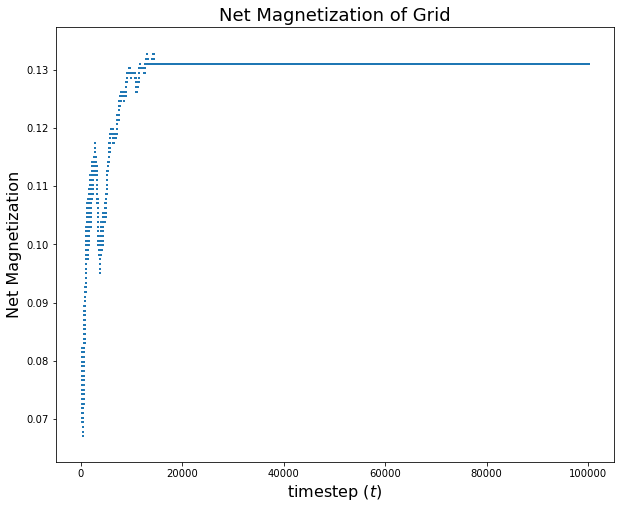

In [22]:
fig=plt.figure(figsize=(10,8));  
plt.xlabel(xlabel='timestep ($t$)',fontsize=16)
plt.ylabel(ylabel='Net Magnetization',fontsize=16)
plt.title('Net Magnetization of Grid',fontsize=18)
plt.scatter(np.arange(0,len(netmag)),netmag,s=1,marker='s')
plt.show()

In [21]:
range(len(netmag))

range(0, 100001)